<a href="https://colab.research.google.com/github/MehrdadDastouri/language_detection_naive_bayes/blob/main/language_detection_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 50.00%

Classification Report:
              precision    recall  f1-score   support

     English       0.00      0.00      0.00         0
      German       1.00      1.00      1.00         1
     Spanish       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.33      0.33      0.33         2
weighted avg       0.50      0.50      0.50         2


Confusion Matrix:
[[0 0 0]
 [0 1 0]
 [1 0 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

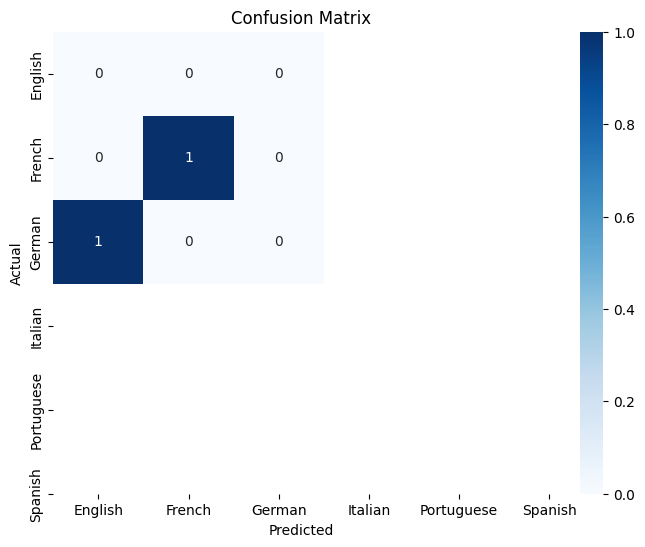


Language Predictions for Custom Inputs:
Text: Bonjour, comment ça va?
Predicted Language: French

Text: Hola amigo, ¿qué tal?
Predicted Language: Spanish

Text: Good evening, how are you?
Predicted Language: English

Text: Wie geht es dir?
Predicted Language: German

Text: Ciao, buongiorno!
Predicted Language: Italian



In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset: Text and their corresponding languages
data = {
    "text": [
        "Bonjour tout le monde",  # French
        "Hola, ¿cómo estás?",  # Spanish
        "Hallo, wie geht es dir?",  # German
        "Hello, how are you?",  # English
        "Ciao, come stai?",  # Italian
        "Olá, como você está?",  # Portuguese
        "Salut, ça va?",  # French
        "¿Qué tal?",  # Spanish
        "Guten Tag, wie geht's?",  # German
        "Good morning",  # English
    ],
    "language": [
        "French",
        "Spanish",
        "German",
        "English",
        "Italian",
        "Portuguese",
        "French",
        "Spanish",
        "German",
        "English",
    ],
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["language"], test_size=0.2, random_state=42)

# Convert text to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)  # Fit and transform training data
X_test_vec = vectorizer.transform(X_test)  # Transform test data

# Initialize and train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Test the model with custom inputs
custom_texts = [
    "Bonjour, comment ça va?",  # French
    "Hola amigo, ¿qué tal?",  # Spanish
    "Good evening, how are you?",  # English
    "Wie geht es dir?",  # German
    "Ciao, buongiorno!",  # Italian
]

print("\nLanguage Predictions for Custom Inputs:")
for text in custom_texts:
    lang = model.predict(vectorizer.transform([text]))[0]
    print(f"Text: {text}")
    print(f"Predicted Language: {lang}\n")